# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
# Openweathermap API key
from api_keys import weather_api_key

## Generate Cities List

In [13]:
# Creating a list of latitudes-longitudes, and cities
cities=[]

# Longitude, latitude combinations and then values within the given range is 
# equally likely drawn by uniform
lat = np.random.uniform(-90, 90, 1500)
lon = np.random.uniform(-180, 180, 1500)

# zip funtion is used to iterating in pair of latitudes and longitues.
lats_lons = zip(lat, lon)

# Finding nearest city for each latitue and longitude in pair
for lt_lo in lats_lons:
    city = citipy.nearest_city(lt_lo[0], lt_lo[1]).city_name
    
    # Finding unique city, then adding to cities list
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
base_url="http://api.openweathermap.org/data/2.5/weather?"
units="metric"
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

city_name=[]
lat=[]
lon=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country_name=[]
date=[]

print("Beginning Data Retrieval")
print("-------------------------------")

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country_name.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record  of Set  | {city}")
    except:
        print("City not found. Skipping...")
        pass
    
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record  of Set  | atuona
City not found. Skipping...
Processing Record  of Set  | dunedin
Processing Record  of Set  | coquimbo
Processing Record  of Set  | mataura
Processing Record  of Set  | huimilpan
Processing Record  of Set  | rikitea
Processing Record  of Set  | muros
Processing Record  of Set  | arraial do cabo
Processing Record  of Set  | kununurra
Processing Record  of Set  | tuatapere
Processing Record  of Set  | cartagena del chaira
Processing Record  of Set  | port elizabeth
Processing Record  of Set  | manavalakurichi
Processing Record  of Set  | aktash
Processing Record  of Set  | geraldton
Processing Record  of Set  | isangel
Processing Record  of Set  | mount isa
Processing Record  of Set  | oudtshoorn
Processing Record  of Set  | busselton
Processing Record  of Set  | bengkulu
Processing Record  of Set  | portland
Processing Record  of Set  | bredasdorp
Processing Record  of Set  | hithadhoo
Processin

Processing Record  of Set  | yarega
Processing Record  of Set  | sjoholt
Processing Record  of Set  | skjervoy
Processing Record  of Set  | umm kaddadah
Processing Record  of Set  | gat
Processing Record  of Set  | alofi
Processing Record  of Set  | hualmay
Processing Record  of Set  | amnat charoen
City not found. Skipping...
City not found. Skipping...
Processing Record  of Set  | siilinjarvi
Processing Record  of Set  | ilulissat
Processing Record  of Set  | beira
Processing Record  of Set  | padang
Processing Record  of Set  | port shepstone
Processing Record  of Set  | bagan
Processing Record  of Set  | jeremoabo
Processing Record  of Set  | naftalan
Processing Record  of Set  | sistranda
City not found. Skipping...
City not found. Skipping...
Processing Record  of Set  | balabac
Processing Record  of Set  | los banos
Processing Record  of Set  | torbay
Processing Record  of Set  | komsomolskiy
Processing Record  of Set  | cabo san lucas
Processing Record  of Set  | codrington
Pro

Processing Record  of Set  | say
Processing Record  of Set  | ampanihy
Processing Record  of Set  | jharsuguda
Processing Record  of Set  | edd
Processing Record  of Set  | vila velha
Processing Record  of Set  | sinnamary
Processing Record  of Set  | grocka
Processing Record  of Set  | leshukonskoye
Processing Record  of Set  | ketchikan
Processing Record  of Set  | santona
Processing Record  of Set  | salalah
Processing Record  of Set  | sorada
Processing Record  of Set  | camacha
Processing Record  of Set  | neder vindinge
City not found. Skipping...
Processing Record  of Set  | lorengau
Processing Record  of Set  | guiratinga
Processing Record  of Set  | yenagoa
Processing Record  of Set  | verkhoyansk
Processing Record  of Set  | souillac
Processing Record  of Set  | olafsvik
Processing Record  of Set  | chignahuapan
Processing Record  of Set  | osorno
Processing Record  of Set  | xiazhen
Processing Record  of Set  | gillette
Processing Record  of Set  | inongo
Processing Record  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Creating a dataframe
weather_report={"City":city_name, "Country":country_name, "Latitude":lat, "Longitude":lon, "Max Temperature":max_temp,"Humidity":humidity,
                         "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Date":date}
weather_df=pd.DataFrame(weather_report) 

# Finding the number of cities with weather report
print(f"Total number of cities with weather report {len(weather_df.index)}")
weather_df.head()

Total number of cities with weather report 581


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Atuona,PF,-9.8000,-139.0333,25.22,77,18,10.22,1626134823
1,Dunedin,NZ,-45.8742,170.5036,8.12,72,100,1.71,1626134682
2,Coquimbo,CL,-29.9533,-71.3436,13.08,80,95,1.99,1626134596
3,Mataura,NZ,-46.1927,168.8643,6.73,88,86,1.02,1626134579
4,Huimilpan,MX,20.3720,-100.2774,18.50,74,100,2.64,1626135100


In [16]:
weather_df.to_csv(r'Output\city_weather.csv')

In [17]:
# Finding the aggregate values of all the numeric columns in the dataframe
agg_weather_summary=weather_df.agg('describe')
agg_weather_summary

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.412829,14.574681,21.106540,71.141136,56.101549,3.544010,1.626135e+09
std,32.440913,89.872513,7.536772,20.205258,38.881097,2.704673,1.567546e+02
min,-54.800000,-179.166700,0.770000,3.000000,0.000000,0.000000,1.626134e+09
25%,-5.950000,-65.038500,15.980000,63.000000,12.000000,1.630000,1.626135e+09
50%,24.687700,20.040300,21.770000,76.000000,69.000000,2.750000,1.626135e+09
75%,46.616600,92.750000,26.950000,85.000000,92.000000,4.890000,1.626135e+09
max,78.218600,179.316700,42.920000,100.000000,100.000000,14.480000,1.626135e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
humidity_gt_hundred=weather_df.loc[weather_df['Humidity'] > 100]

humidity_gt_hundred.Humidity.count()

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

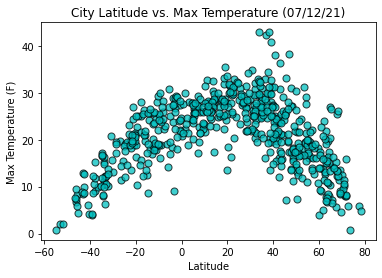

In [21]:
# Scatter plot Maximum Temperature Vs. Latitude
plt.scatter(weather_df.iloc[:,2], weather_df.iloc[:, 4], marker='o', 
            edgecolor='black', s=50, alpha=0.75, c ='c', label="Avg Tumor Volume")

plt.title("City Latitude vs. Max Temperature (07/12/21)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

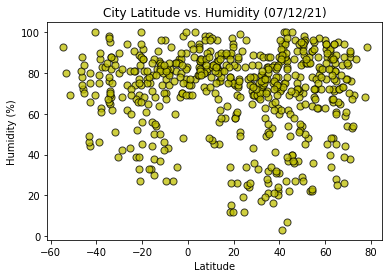

In [22]:
# Scatter plot Humidity (%) Vs. Latitude
plt.scatter(weather_df.iloc[:,2], weather_df.iloc[:, 5], marker='o', 
            edgecolor='black', s=50, alpha=0.75, c ='y', label="Avg Tumor Volume")

plt.title("City Latitude vs. Humidity (07/12/21)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

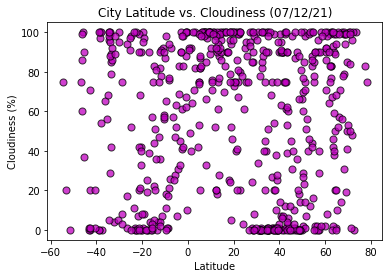

In [23]:
# Scatter plot Cloudiness (%) with Latitude
plt.scatter(weather_df.iloc[:,2], weather_df.iloc[:, 6], marker='o', 
            edgecolor='black', s=50, alpha=0.75, c ='m', label="Avg Tumor Volume")

plt.title("City Latitude vs. Cloudiness (07/12/21)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

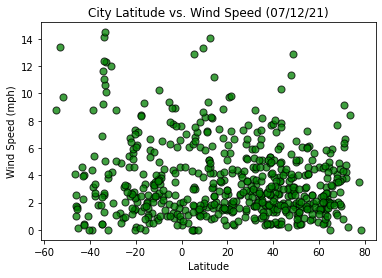

In [24]:
# Scatter plot Wind Speed (mph) Vs. Latitude
plt.scatter(weather_df.iloc[:,2], weather_df.iloc[:, 7], marker='o', 
            edgecolor='black', s=50, alpha=0.75, c ='g', label="Avg Tumor Volume")

plt.title("City Latitude vs. Wind Speed (07/12/21)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

## Linear Regression

In [25]:
import scipy.stats as sts
from scipy.stats import linregress

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

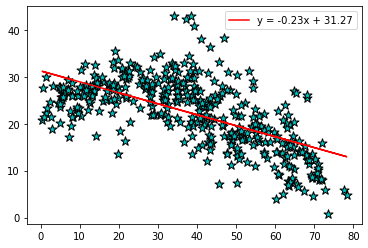

In [26]:
northern_weather=weather_df.loc[weather_df.Latitude > 0]
lat_north=northern_weather['Latitude']
temp_north=northern_weather['Max Temperature']

fig, ax = plt.subplots()

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north,temp_north)

# Calculating the regression value
regress_values = lat_north * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north,temp_north, c='c', marker='*', s=90, edgecolor='black')


plt.plot(lat_north,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

ax.legend(loc='best')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

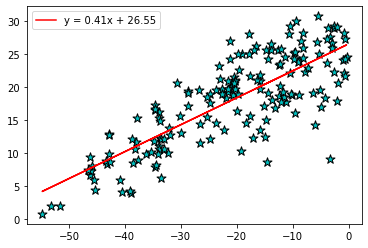

In [27]:
southern_weather=weather_df.loc[weather_df.Latitude < 0]
lat_south=southern_weather['Latitude']
temp_south=southern_weather['Max Temperature']
fig, ax = plt.subplots()
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,temp_south)

# Calculating the regression value
regress_values = lat_south * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south,temp_south, c='c', marker='*', s=90, edgecolor='black')

plt.plot(lat_south,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

ax.legend(loc='best')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

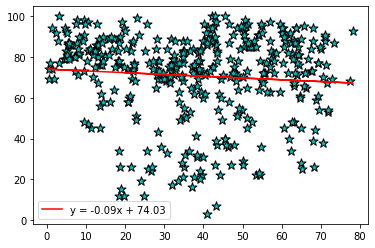

In [28]:
northern_weather=weather_df.loc[weather_df.Latitude > 0]
lat_north=northern_weather['Latitude']
humi_north=northern_weather['Humidity']

fig, ax = plt.subplots()

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north,humi_north)

# Calculating the regression value
regress_values = lat_north * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north,humi_north, c='c', marker='*', s=90, edgecolor='black')


plt.plot(lat_north,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

ax.legend(loc='best')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

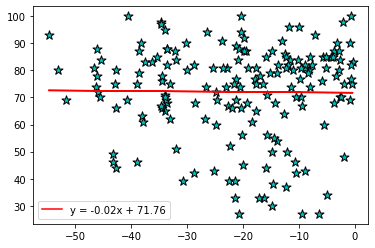

In [29]:
southern_weather=weather_df.loc[weather_df.Latitude < 0]
lat_south=southern_weather['Latitude']
humi_south=southern_weather['Humidity']
fig, ax = plt.subplots()
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,humi_south)

# Calculating the regression value
regress_values = lat_south * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south,humi_south, c='c', marker='*', s=90, edgecolor='black')

plt.plot(lat_south,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

ax.legend(loc='best')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

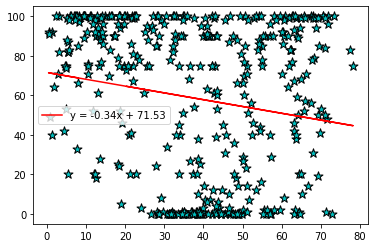

In [30]:
northern_weather=weather_df.loc[weather_df.Latitude > 0]
lat_north=northern_weather['Latitude']
cloud_north=northern_weather['Cloudiness']

fig, ax = plt.subplots()

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north,cloud_north)

# Calculating the regression value
regress_values = lat_north * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north,cloud_north, c='c', marker='*', s=90, edgecolor='black')


plt.plot(lat_north,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

ax.legend(loc=6)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

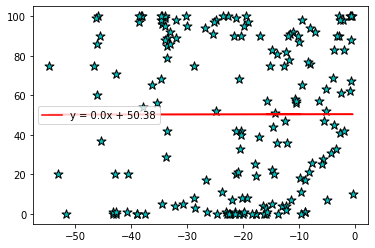

In [31]:
southern_weather=weather_df.loc[weather_df.Latitude < 0]
lat_south=southern_weather['Latitude']
cloud_south=southern_weather['Cloudiness']
fig, ax = plt.subplots()
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,cloud_south)

# Calculating the regression value
regress_values = lat_south * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south,cloud_south, c='c', marker='*', s=90, edgecolor='black')

plt.plot(lat_south,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

ax.legend(loc=6)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

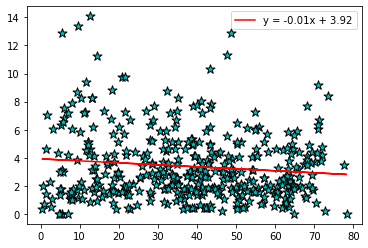

In [32]:
northern_weather=weather_df.loc[weather_df.Latitude > 0]
lat_north=northern_weather['Latitude']
wind_north=northern_weather['Wind Speed']

fig, ax = plt.subplots()

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north,wind_north)

# Calculating the regression value
regress_values = lat_north * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north,wind_north, c='c', marker='*', s=90, edgecolor='black')


plt.plot(lat_north,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

ax.legend(loc='best')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

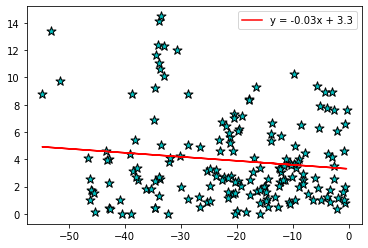

In [33]:
southern_weather=weather_df.loc[weather_df.Latitude < 0]
lat_south=southern_weather['Latitude']
wind_south=southern_weather['Wind Speed']
fig, ax = plt.subplots()
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,wind_south)

# Calculating the regression value
regress_values = lat_south * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south,wind_south, c='c', marker='*', s=90, edgecolor='black')

plt.plot(lat_south,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

ax.legend(loc='best')